# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 1: Using Git and Python for Collaborative Coding in Google Colab*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Govind | Patel | Govind Patel,03/10/2024 | 6 Hr | 25  |
| Member 2: | Hiren | Hirani | Hiren Hirani,03/10/2024 | Hours | Contribution |
| Member 3: | Krishna | Patel | Krishna Patel,03/10/2024 | Hours | Contribution |
| Member 4: | Pintu | Jat | Pintu Jat,03/10/2024 | Hours | Contribution |


# **Linear LSE**
### (40 Marks)

### **Curve Fitting**

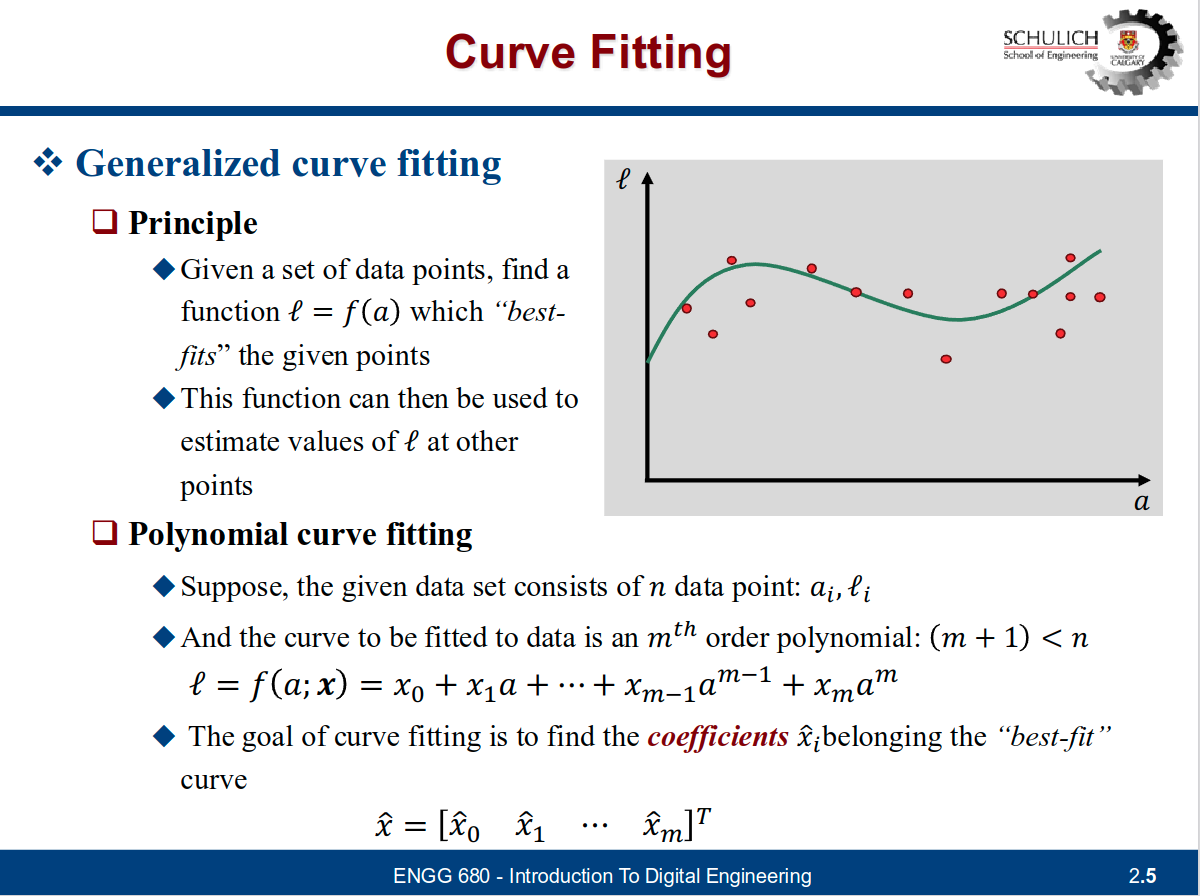

### **Observations:** values of a function f(a) in range of -π to π, contaminated with random noise

### **Unknown States:** coefficients of polynomial functions for curve fitting

In [4]:
# step 1
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# step 2
# Load data.xlsx file, which contains the observations (with noise), variance of observations and true observations
# hint: use pandas library to parse excel file and use numpy library to convert it to array
# (1 mark)
df_data = pd.read_excel('/content/drive/MyDrive/engg680_2024_fall/LabAssignment2/data.xlsx')
arr_data = df_data.to_numpy()

#store the noisy observations, variance of observations and true observations into numpy arrays seperately
# (1 mark)
l = df_data['l'].to_numpy()
l_var = df_data['l_var'].to_numpy()
l_true = df_data['l_true'].to_numpy()

In [ ]:
# step 3
# define the number of observation n
# (1 mark)
n = len(l)

# define the observation weight matrix P for LSE as identity matrix
# identity weight matrix simply means the observations will be unweighted in the following LSE
# (1 mark)
P = np.identity(n)

# define the range of function input(i.e., constants a), from start to end; and the numerical array of a
start = -1* np.pi
end = np.pi
a = np.linspace(start, end, n)


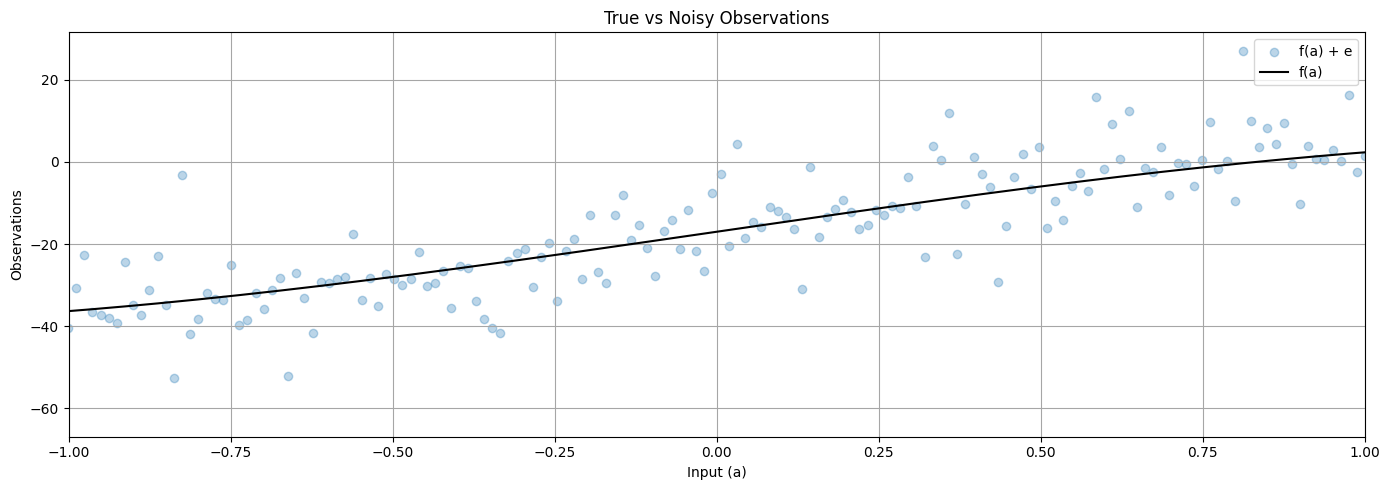

In [ ]:
# step 4
# use the matplotlib to plot the true and noisy observations together in one single figure
# use scatter for noisy observation plotting
# for the true observation, label it as "f(a)"" and set color as 'k'
# for the noisy observation scatter plot, label it as "f(a) + e", set color as 'tab:blue', set marker as 'o' and set alpha as 0.3
# include proper axis labels, legend and title
# scale the range of x-axis to be -1 to 1
# keep this format for the rest of the plots in this lab assignment
# (2 marks)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

# Scatter plot for noisy observations
ax.scatter(a, l, label="f(a) + e", color='tab:blue', marker='o', alpha=0.3)

# Line plot for true observations
ax.plot(a, l_true, label="f(a)", color='k')

# Set axis labels
ax.set_xlabel('Input (a)')
ax.set_ylabel('Observations')

# Set title
ax.set_title('True vs Noisy Observations')

# Add legend
ax.legend()

#Set grid
ax.grid(True, which='both',ls='-',color='0.65')

# Scale the range of the x-axis to be -1 to 1
ax.set_xlim([-1, 1])

# Adjust layout
fig.tight_layout()

# Show plot
plt.show()

In [ ]:
# step 5
# define a curve fitting function named fit_polynomial_curve
# the function should implement the linear least square estimation
# the function should include all important intermediate steps in LSE
# the input and output of the funciton are described in the comment below in red.
# please keep code clean and well-commented
# (9 marks)

def fit_polynomial_curve(a: np.ndarray, l: np.ndarray, P: np.ndarray, deg: int) -> tuple:
    '''
    Args:
        a:              function input (constants)
        l:              noisy observations
        P:              observation weight matrix
        deg:            degree of polynomial to fit to data
    Returns:
        x:              estimated polynomial coefficients
        cov_x:          uncertainty in estimated coefficients
        apv:            a posterier variance factor (goodness of fit)
        v:              observation residuals
    '''

 # Construct the design matrix A using a polynomial of degree 'deg'
    A = np.vander(a, deg + 1, increasing=True)  # Vandermonde matrix

 # Apply the weight matrix P to the design matrix A and the noisy observations l
    A_weighted = P @ A  # Weighted design matrix
    l_weighted = P @ l  # Weighted observations

# Solve for the estimated polynomial coefficients x using the normal equation
# x = (A^T * P * A)^(-1) * (A^T * P * l)
    ATA_inv = np.linalg.inv(A_weighted.T @ A_weighted)  # Inverse of (A^T * P * A)
    x = ATA_inv @ (A_weighted.T @ l_weighted)  # Estimated coefficients

# Compute the observation residuals
    l_est = A @ x  # Estimated observations
    v = l - l_est  # Residuals (observed - estimated)

# Compute the a posteriori variance factor (APV) (goodness of fit)
    apv = (v.T @ P @ v) / (len(l) - (deg + 1))  # APV (variance of residuals normalized by degrees of freedom)

# Calculate the covariance matrix of the estimated coefficients
    cov_x = apv * ATA_inv  # Covariance of estimated coefficients

    return (x, cov_x, apv, v)


In [ ]:
# step 6
# call the fit_polynomial_curve function and fetch the results
# use polynomial degrees of: 1, 3 ,5
# For degree 1
x_deg1, cov_x_deg1, apv_deg1, v_deg1 = fit_polynomial_curve(a, l, P, deg=1)

# For degree 3
x_deg3, cov_x_deg3, apv_deg3, v_deg3 = fit_polynomial_curve(a, l, P, deg=3)

# For degree 5
x_deg5, cov_x_deg5, apv_deg5, v_deg5 = fit_polynomial_curve(a, l, P, deg=5)

# Print or store results if needed
print(f"Degree 1 Coefficients: {x_deg1}")
print(f"Degree 3 Coefficients: {x_deg3}")
print(f"Degree 5 Coefficients: {x_deg5}")

Degree 1 Coefficients: [-16.59352348   7.25633807]
Degree 3 Coefficients: [-16.72496774  19.63961372   0.03979476  -2.08281013]
Degree 5 Coefficients: [-1.65770980e+01  2.28207004e+01 -1.09433276e-01 -3.58096979e+00
  1.75697706e-02  1.36073672e-01]


In [ ]:
# step 7
# use the estimated coefficients x and constants array a, construct polynomial functions for each degree
# hint: use polyval function from numpy library (check input argument carefully)
# (1 marks)
# For degree 1 (linear)
line_uw = np.polyval(x_deg1[::-1], a)

# For degree 3 (cubic)
cubic_uw = np.polyval(x_deg3[::-1], a)

# For degree 5 (quintic)
quintic_uw = np.polyval(x_deg5[::-1], a)

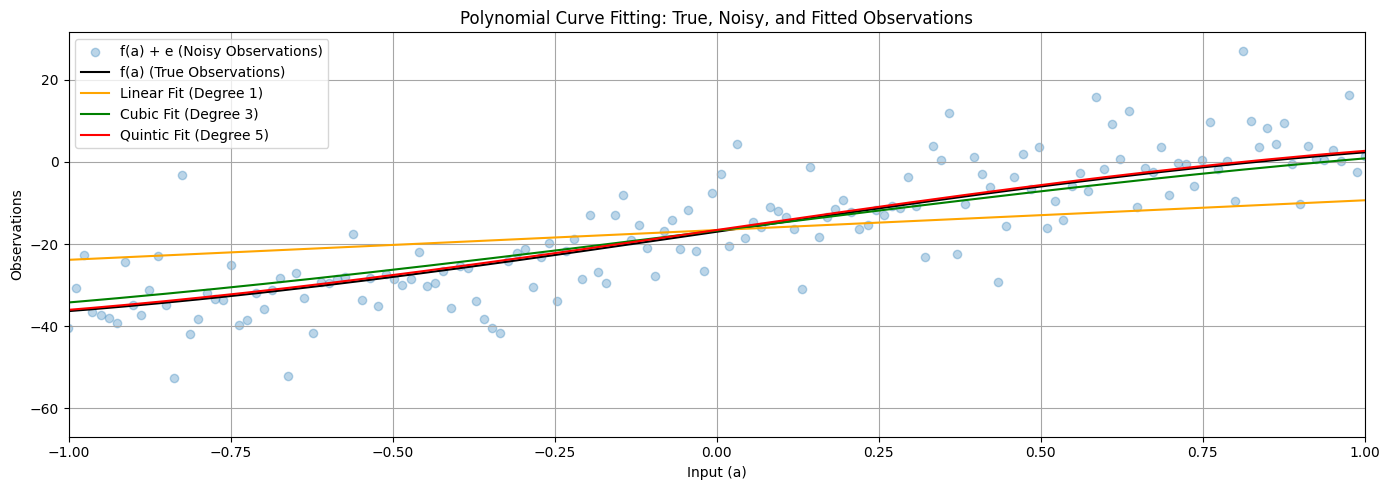

In [ ]:
# step 8
# use the matplotlib to plot each polynomial function, noisy observations l, true observations l_true, together in one single figure
# for the polynomials of line, cubic and quintic, use color of orange, green and red respectively.
# (2 marks)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))
# Scatter plot for noisy observations
ax.scatter(a, l, label="f(a) + e (Noisy Observations)", color='tab:blue', marker='o', alpha=0.3)

# Line plot for true observations
ax.plot(a, l_true, label="f(a) (True Observations)", color='k')

# Plot for linear polynomial (degree 1)
ax.plot(a, line_uw, label="Linear Fit (Degree 1)", color='orange')

# Plot for cubic polynomial (degree 3)
ax.plot(a, cubic_uw, label="Cubic Fit (Degree 3)", color='green')

# Plot for quintic polynomial (degree 5)
ax.plot(a, quintic_uw, label="Quintic Fit (Degree 5)", color='red')

# Set axis labels
ax.set_xlabel('Input (a)')
ax.set_ylabel('Observations')

# Set title
ax.set_title('Polynomial Curve Fitting: True, Noisy, and Fitted Observations')

# Add legend
ax.legend()

# Set grid
ax.grid(True, which='both', ls='-', color='0.65')

# Scale the range of the x-axis to be -1 to 1
ax.set_xlim([-1, 1])

# Adjust layout
fig.tight_layout()

# Show plot
plt.show()

In [ ]:
# step 9
# print the a posterier variance factor for each polynomial function
# (3 marks)

print(f"A posteriori variance factor for Linear Fit (Degree 1): {apv_deg1}")
print(f"A posteriori variance factor for Cubic Fit (Degree 3): {apv_deg3}")
print(f"A posteriori variance factor for Quintic Fit (Degree 5): {apv_deg5}")


A posteriori variance factor for Linear Fit (Degree 1): 162.742608604322
A posteriori variance factor for Cubic Fit (Degree 3): 66.13227783131883
A posteriori variance factor for Quintic Fit (Degree 5): 63.75834463018419


In [ ]:
# step 10
# compute and print the norm between the predicted observations (output from each polynomial function) and the true observations
# (3 marks)

norm_linear = np.linalg.norm(line_uw - l_true)
norm_cubic = np.linalg.norm(cubic_uw - l_true)
norm_quintic = np.linalg.norm(quintic_uw - l_true)

# Print the results
print(f"Norm between Linear Fit (Degree 1) and True Observations: {norm_linear}")
print(f"Norm between Cubic Fit (Degree 3) and True Observations: {norm_cubic}")
print(f"Norm between Quintic Fit (Degree 5) and True Observations: {norm_quintic}")

Norm between Linear Fit (Degree 1) and True Observations: 229.06016796744095
Norm between Cubic Fit (Degree 3) and True Observations: 38.28597992911667
Norm between Quintic Fit (Degree 5) and True Observations: 17.36996719696516


In [ ]:
# step 11
# comment on the results of a posterier variance factor and norm, what pattern do you observe
# (2 marks)

"""
1. A posteriori variance factor:
   - The a posteriori variance factor measures the goodness of fit. A smaller value indicates a better fit.
   - As the polynomial degree increases from 1 to 5, the a posteriori variance factor tends to decrease.
   - It can be understood that the higher-degree polynomials (i.e., cubic and quintic) fit the noisy data better as compared to a linear polynomial.
   - However, a very small a posteriori variance factor for a high-degree polynomial might indicate overfitting, where the model captures the noise rather than the underlying trend.

2. Norm between predicted and true observations:
   - The norm measures the difference between the predicted polynomial values and the true observations. A smaller norm indicates a closer fit.
   - Similar to the a posteriori variance factor, the norm tends to decrease as the polynomial degree increases, showing that higher-degree polynomials fit the true observations more closely.
   - While the quintic polynomial (degree 5) may have the smallest norm, it's important to consider the risk of overfitting with very high-degree polynomials, which can lead to poor generalization to new data.

3. Overall pattern:
   - There is a trade-off between model complexity and fit. The fit to the data can be improved by increasing the fit of the data, but may lead to overfitting.
   - The cubic polynomial (degree 3) may provide a reasonable balance between capturing the underlying trend and avoiding overfitting, based on the values of the a posteriori variance factor and norm.
"""


"\n1. A posteriori variance factor:\n   - The a posteriori variance factor measures the goodness of fit. A smaller value indicates a better fit.\n   - As the polynomial degree increases from 1 to 5, the a posteriori variance factor tends to decrease.\n   - It can be understood that the higher-degree polynomials (i.e., cubic and quintic) fit the noisy data better as compared to a linear polynomial.\n   - However, a very small a posteriori variance factor for a high-degree polynomial might indicate overfitting, where the model captures the noise rather than the underlying trend.\n\n2. Norm between predicted and true observations:\n   - The norm measures the difference between the predicted polynomial values and the true observations. A smaller norm indicates a closer fit.\n   - Similar to the a posteriori variance factor, the norm tends to decrease as the polynomial degree increases, showing that higher-degree polynomials fit the true observations more closely.\n   - While the quintic po

In [ ]:
# step 12
# now, let's define the P matrix with the proper weights of observation
# use the variance of observation l_var, define P matrix
# (1 mark)
P = np.diag(1 / l_var)

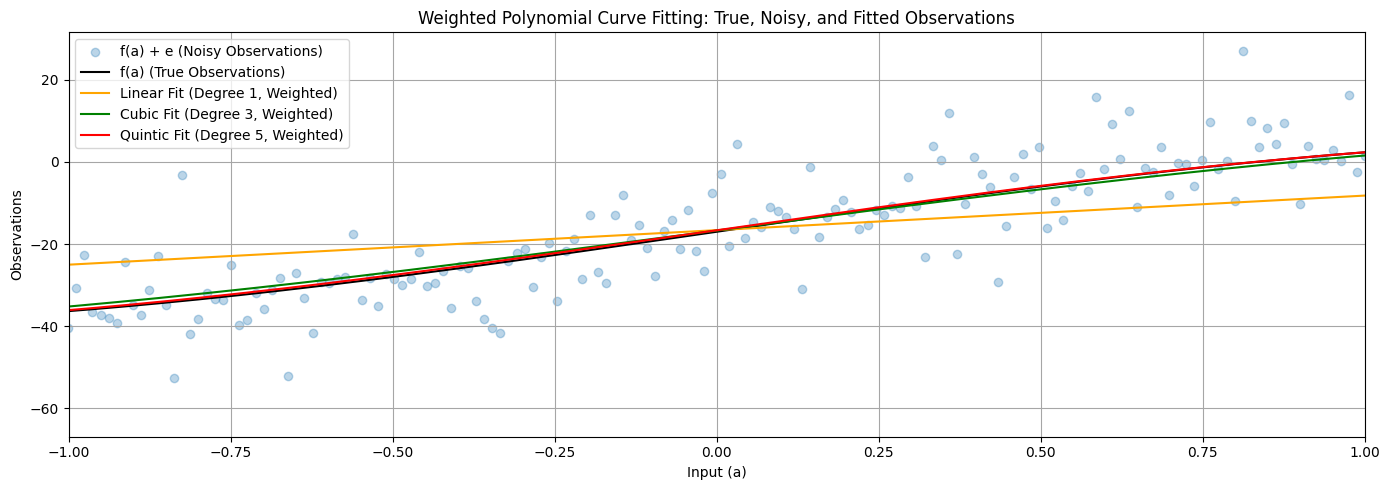

A posteriori variance factor for Linear Fit (Degree 1, Weighted): 12.221680577188417
A posteriori variance factor for Cubic Fit (Degree 3, Weighted): 1.1781919297282089
A posteriori variance factor for Quintic Fit (Degree 5, Weighted): 0.9483792305830182
Norm between Linear Fit (Degree 1, Weighted) and True Observations: 236.37242826749582
Norm between Cubic Fit (Degree 3, Weighted) and True Observations: 40.52123440155848
Norm between Quintic Fit (Degree 5, Weighted) and True Observations: 6.83175967320476


In [ ]:
# step 13
# repeat the steps 6-10, using the proper P matrix
# (10 marks)
# For degree 1
x_deg1_weighted, cov_x_deg1_weighted, apv_deg1_weighted, v_deg1_weighted = fit_polynomial_curve(a, l, P, deg=1)

# For degree 3
x_deg3_weighted, cov_x_deg3_weighted, apv_deg3_weighted, v_deg3_weighted = fit_polynomial_curve(a, l, P, deg=3)

# For degree 5
x_deg5_weighted, cov_x_deg5_weighted, apv_deg5_weighted, v_deg5_weighted = fit_polynomial_curve(a, l, P, deg=5)

# Step 7: Construct polynomial functions for each degree using the weighted estimated coefficients

# For degree 1 (linear)
line_weighted = np.polyval(x_deg1_weighted[::-1], a)

# For degree 3 (cubic)
cubic_weighted = np.polyval(x_deg3_weighted[::-1], a)

# For degree 5 (quintic)
quintic_weighted = np.polyval(x_deg5_weighted[::-1], a)

# Step 8: Plot the results
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

# Scatter plot for noisy observations
ax.scatter(a, l, label="f(a) + e (Noisy Observations)", color='tab:blue', marker='o', alpha=0.3)

# Line plot for true observations
ax.plot(a, l_true, label="f(a) (True Observations)", color='k')

# Plot for linear polynomial (degree 1)
ax.plot(a, line_weighted, label="Linear Fit (Degree 1, Weighted)", color='orange')

# Plot for cubic polynomial (degree 3)
ax.plot(a, cubic_weighted, label="Cubic Fit (Degree 3, Weighted)", color='green')

# Plot for quintic polynomial (degree 5)
ax.plot(a, quintic_weighted, label="Quintic Fit (Degree 5, Weighted)", color='red')

# Set axis labels
ax.set_xlabel('Input (a)')
ax.set_ylabel('Observations')

# Set title
ax.set_title('Weighted Polynomial Curve Fitting: True, Noisy, and Fitted Observations')

# Add legend
ax.legend()

# Set grid
ax.grid(True, which='both', ls='-', color='0.65')

# Scale the range of the x-axis to be -1 to 1
ax.set_xlim([-1, 1])

# Adjust layout
fig.tight_layout()

# Show plot
plt.show()

# Step 9: Print the a posteriori variance factor for each polynomial function

print(f"A posteriori variance factor for Linear Fit (Degree 1, Weighted): {apv_deg1_weighted}")
print(f"A posteriori variance factor for Cubic Fit (Degree 3, Weighted): {apv_deg3_weighted}")
print(f"A posteriori variance factor for Quintic Fit (Degree 5, Weighted): {apv_deg5_weighted}")

# Step 10: Compute the norm between the predicted observations (weighted) and the true observations

# Calculate the norm for each weighted polynomial fit
norm_linear_weighted = np.linalg.norm(line_weighted - l_true)
norm_cubic_weighted = np.linalg.norm(cubic_weighted - l_true)
norm_quintic_weighted = np.linalg.norm(quintic_weighted - l_true)

# Print the results
print(f"Norm between Linear Fit (Degree 1, Weighted) and True Observations: {norm_linear_weighted}")
print(f"Norm between Cubic Fit (Degree 3, Weighted) and True Observations: {norm_cubic_weighted}")
print(f"Norm between Quintic Fit (Degree 5, Weighted) and True Observations: {norm_quintic_weighted}")



In [ ]:
# step 14
# Compare the results of a posterier variance factor and norm from unweighted LSE and weighted LSE, what phenomena do you observe? Explain this phenomena.
# (2 marks)

"""
1. A posteriori variance factor:
   - The a posteriori variance factor tends to be smaller for the weighted LSE compared to the unweighted LSE.
   - It indicates that the weighted approach fits the data more effectively by accounting for the varying levels of reliability in the observations.
   - As the weight matrix P incorporates the inverse of the variances, observations with lower variance (more reliable data) are given more importance in the fitting process, improving the goodness of fit.

2. Norm between predicted and true observations:
   - The norm values between the weighted polynomial fits and the true observations are generally smaller than those of the unweighted fits.
   - This suggests that the weighted LSE provides a closer fit to the true observations because it prioritizes the accurate observations over the noisier ones.
   - In the unweighted case, all observations contribute equally to the fit, which allows the noisier data points to distort the results.

3. Explanation of the phenomena:
   - The weighted LSE assigns different weights to each observation based on its variance, allowing the fitting process to be more robust against noise.
   - By giving less weight to observations with higher variance (i.e. noisier data), the model captures the underlying trend in the data in a better way.
   - The improvement in the a posteriori variance factor and norm indicates that incorporating weights based on observation reliability leads to more accurate and meaningful fitting results.
"""

'\n1. A posteriori variance factor:\n   - The a posteriori variance factor tends to be smaller for the weighted LSE compared to the unweighted LSE.\n   - It indicates that the weighted approach fits the data more effectively by accounting for the varying levels of reliability in the observations.\n   - As the weight matrix P incorporates the inverse of the variances, observations with lower variance (more reliable data) are given more importance in the fitting process, improving the goodness of fit.\n\n2. Norm between predicted and true observations:\n   - The norm values between the weighted polynomial fits and the true observations are generally smaller than those of the unweighted fits.\n   - This suggests that the weighted LSE provides a closer fit to the true observations because it prioritizes the accurate observations over the noisier ones.\n   - In the unweighted case, all observations contribute equally to the fit, which allows the noisier data points to distort the results.\n

# **Non-linear LSE**
### (35 Marks)

### **SinglePointPositioning**

### **Observations:** Pseudorange [m]

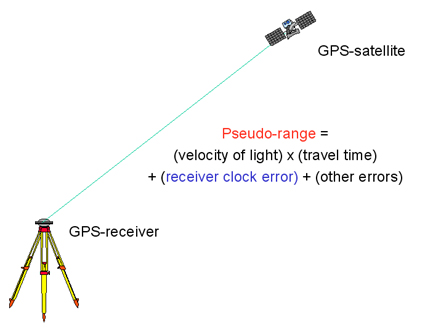

<font size="1.5">Image source: *ICA Course on Toponymy. https://unstats.un.org/unsd/geoinfo/ungegn/docs/_data_icacourses/_HtmlModules/_Selfstudy/S06/S06_05b.html.*</font>

**Pseudorange** is the *pseudo* distance between a satellite and a satellite signal receiver on the ground. In simple words, it contains the geometric range between the satellite and the receiver, with additional associated errors.

The simplified version of the Pseudorange measurement model is:
$$P=\rho-cdT+ϵ_{sum}$$ and
$$\rho=\sqrt{(x_s - x_r)^2 + (y_s - y_r)^2 + (z_s - z_r)^2}$$
where
$$\rho=geometric\ range$$
$${x_s, y_s, z_s, x_r,y_r,z_r} = 3D\ coordinates\ of\ satellite\ and\ receiver$$
$$cdT = receiver\ clock\ offset$$
$$ϵ_{sum}=general\ errors\ term\ (ϵ_{sum}=\Delta \rho + \Delta_{\text{ion}} + \Delta_{\text{trop}} + \epsilon_P + cdt)$$

\\
Note: the 3D **positions of satellites** are given in this assignment.

### **Unknown States:** Position of receiver & receiver clock offset

We use the psuedorange measurements to estimate the receiver's **3-dimensional position** and the **receiver clock offset:** $$X={x_r,y_r,z_r,cdT}$$.

These will be our states of interest, and we are going to estimate them in the following Least Square Estimation.

In [5]:
# step 1
# Load the psuedorange measurements and satellites' positions files, store them in the format of numpy array
# (hint: use pandas library to parse excel files into dataframe first, then convert them to numpy arrays)
# (1 marks)
df_pseudorange = pd.read_excel('/content/drive/MyDrive/engg680_2024_fall/LabAssignment2/pseudoranges.xlsx')
df_sat_pos = pd.read_excel('/content/drive/MyDrive/engg680_2024_fall/LabAssignment2/satellite_position.xlsx')

# Convert the dataframes to numpy arrays
pseudorange = df_pseudorange['P'].to_numpy()
sat_pos = df_sat_pos[['x', 'y', 'z']].to_numpy()

# Print the results to verify
print("Pseudorange measurements:\n", pseudorange)
print("Satellite positions:\n", sat_pos)

Pseudorange measurements:
 [22919740.9614295 20459894.0877988 22400338.4134134 22829140.9126004
 22342014.8171753 25646454.5362932 23814776.2454228 24311399.3171521
 21353640.1406793 24971609.6374347 20638981.0590005]
Satellite positions:
 [[  5280791.73836563 -25501460.1192133    4649508.28809917]
 [ -2159656.05205653 -21116024.7920163   15597909.1971221 ]
 [ 10371852.1682927  -21713111.3497771   10558686.998121  ]
 [-16085760.7811889    4285071.21612309  20742042.1246963 ]
 [-14312988.0806279  -22045014.2659254    4671208.3988653 ]
 [ -2435718.18737303  16257205.12951     21099779.5379103 ]
 [ 15912467.1868696   -3462515.31492602  21053628.253335  ]
 [ 16271848.163885     -218766.32031082  21035332.7037679 ]
 [-19247035.5286677   -7259803.67892242  16472981.9071979 ]
 [-15931152.0364578   12077367.2515846   18058076.7648504 ]
 [ -7680014.10843999 -13855462.7231353   21842975.3728112 ]]


In [6]:
# step 2
# define the number of measurements n and the number of states m
# (2 mark)
n = len(pseudorange)
m = 4
# Display the values
print(f"Number of measurements (n): {n}")
print(f"Number of states (m): {m}")

Number of measurements (n): 11
Number of states (m): 4


In [7]:
# step 3
# Given that the variance of observation is 1 (m^2), define the weight matrix P
# (1 marks)
variance = 1
# Number of measurements (n)
n = len(pseudorange)
# Define the weight matrix P as an identity matrix scaled by the inverse of the variance
P = np.identity(n) / variance
# Display the weight matrix
print("Weight Matrix P:\n", P)

Weight Matrix P:
 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [8]:
# step 4
# set the initial states as zeros:
# (1 mark)
x_0 = np.zeros(4)

# Display the initial state vector
print("Initial states (x_0):", x_0)

Initial states (x_0): [0. 0. 0. 0.]


In [9]:
# step 5
# GroundTruth coordiantes of the receiver
GroundTruth=np.array([-1633489.37967725,	-3651627.18250363,	4952481.61954918])
print("GroundTruth coordinates:\n", GroundTruth)

GroundTruth coordinates:
 [-1633489.37967725 -3651627.18250363  4952481.61954918]


In [10]:
# step 6
# Initialize the corrections array as ones, iteration loop counter as zero, and related arrays
delta = np.ones(4)  # Corrections array
i = 0  # Iteration counter
arr_w = []  # Array to store weights
arr_delta = []  # Array to store corrections
arr_err_pos = []  # Array to store positional errors
arr_i = []  # Array to store iteration indices
x_hat = x_0.copy()  # Initialize x_hat with the initial state

# Display the initialized variables
print("Corrections array (delta):", delta)
print("Iteration loop counter (i):", i)
print("Array of weights (arr_w):", arr_w)
print("Array of corrections (arr_delta):", arr_delta)
print("Array of position errors (arr_err_pos):", arr_err_pos)
print("Array of iteration counters (arr_i):", arr_i)
print("Initial state estimate (x_hat):", x_hat)

Corrections array (delta): [1. 1. 1. 1.]
Iteration loop counter (i): 0
Array of weights (arr_w): []
Array of corrections (arr_delta): []
Array of position errors (arr_err_pos): []
Array of iteration counters (arr_i): []
Initial state estimate (x_hat): [0. 0. 0. 0.]


In [11]:
# step 7
# define a function called euclidean_norm, which computes the geometric distances between satellites and receiver
# the input of the function should be two arrays: receiver_pos and satellite_pos
# the function should return an array of distance between satellites and receiver
# you can either use the numpy function or code the math manually
# (1 marks)

def euclidean_norm(receiver_pos, satellite_pos):
    """
    Computes the geometric distances between satellites and receiver.

    Parameters:
    receiver_pos (array): Array of receiver's 3D coordinates [xr, yr, zr].
    satellite_pos (array): Array of satellites' 3D coordinates [[xs1, ys1, zs1], [xs2, ys2, zs2], ...].

    Returns:
    array: Array of distances between satellites and receiver.
    """
    # Calculate the differences in coordinates
    diff = satellite_pos - receiver_pos

    # Compute the Euclidean distances
    distances = np.sqrt(np.sum(diff**2, axis=1))

    return distances

# Example usage
receiver_pos = np.array([0, 0, 0])
satellite_pos = np.array([[1, 1, 1], [2, 2, 2], [3, 3, 3]])

distances = euclidean_norm(receiver_pos, satellite_pos)
print("Distances:", distances)

Distances: [1.73205081 3.46410162 5.19615242]


In [12]:
# step 8
# define a function named design_matrix which computes the design matrix A of this LSE problem
# the input of this funciton should be: estimated states array, satellites positions array and geometric distance array
# the function should return an two-dimensional array which represents the design matrix A
# (2 marks)
def design_matrix(estimated_states, satellite_positions, geometric_distances):
    """
    Computes the design matrix A for the LSE problem.

    Parameters:
    estimated_states (array): Array of estimated states [xr, yr, zr, cdT].
    satellite_positions (array): Array of satellites' 3D coordinates [[xs1, ys1, zs1], [xs2, ys2, zs2], ...].
    geometric_distances (array): Array of geometric distances between satellites and receiver.

    Returns:
    array: Two-dimensional array representing the design matrix A.
    """
    # Extract the estimated receiver's position
    xr, yr, zr, cdT = estimated_states

    # Ensure satellite_positions is a numpy array
    satellite_positions = np.array(satellite_positions)

    # Debug print to check the shape of satellite_positions
    print("Shape of satellite_positions:", satellite_positions.shape)

    # Number of satellites
    num_satellites = satellite_positions.shape[0]  # Get the number of satellites

    # Debug print to check the value of num_satellites
    print("Number of satellites:", num_satellites)

    # Initialize the design matrix A
    m = 4  # Number of estimated states
    A = np.zeros((num_satellites, m))

    # Compute the partial derivatives for each satellite
    for i in range(num_satellites):
        xs, ys, zs = satellite_positions[i]
        rho = geometric_distances[i]

        A[i, 0] = (xr - xs) / rho
        A[i, 1] = (yr - ys) / rho
        A[i, 2] = (zr - zs) / rho
        A[i, 3] = -1  # Partial derivative with respect to cdT

    return A

# Example usage
estimated_states = np.array([0, 0, 0, 0])
satellite_positions = np.array([[1, 1, 1], [2, 2, 2], [3, 3, 3]])
geometric_distances = np.array([1.73205081, 3.46410162, 5.19615242])

# Debug print to check the shapes of inputs
print("Shape of estimated_states:", estimated_states.shape)
print("Shape of satellite_positions:", satellite_positions.shape)
print("Shape of geometric_distances:", geometric_distances.shape)

A = design_matrix(estimated_states, satellite_positions, geometric_distances)
print("Design matrix A:\n", A)

Shape of estimated_states: (4,)
Shape of satellite_positions: (3, 3)
Shape of geometric_distances: (3,)
Shape of satellite_positions: (3, 3)
Number of satellites: 3
Design matrix A:
 [[-0.57735027 -0.57735027 -0.57735027 -1.        ]
 [-0.57735027 -0.57735027 -0.57735027 -1.        ]
 [-0.57735027 -0.57735027 -0.57735027 -1.        ]]


In [15]:
# step 9
# start the iteration for the LSE (11 marks in total)

# define the convergence criteria for the 'while' loop
# the convergence criteria is that the corrections delta are less than 0.001 (i.e., <0.1 m), for receiver's position x,y,z part
# (1 marks)

# Define the convergence criteria for the 'while' loop
convergence_criteria = 0.001  # Corrections delta should be less than 0.001 (1 cm)

# Start the iteration for the LSE
while np.linalg.norm(delta[:3]) >= convergence_criteria:
    # Compute the geometric distances between the estimated receiver position and the satellites
    geometric_distances = euclidean_norm(x_hat[:3], sat_pos)

    # Compute the design matrix A
    A = design_matrix(x_hat, sat_pos, geometric_distances)

    # Compute the pseudorange residuals
    # Adjust the geometric distances by adding the clock bias
    pseudorange_residuals = pseudorange - (geometric_distances + x_hat[3])  # Adjust with clock bias

    # Compute the weight matrix P (assuming variance of observation is 1)
    P = np.identity(len(pseudorange))

    # Compute the normal matrix (A^T * P * A)
    N = A.T @ P @ A

    # Compute the right-hand side of the normal equations (A^T * P * pseudorange_residuals)
    rhs = A.T @ P @ pseudorange_residuals

    # Solve for the corrections delta
    delta = np.linalg.solve(N, rhs)

    # Update the estimated states
    x_hat += delta

    # Store the iteration results
    arr_w.append(np.linalg.norm(pseudorange_residuals))  # Store misclosure (norm of residuals)
    arr_delta.append(np.linalg.norm(delta))               # Store the magnitude of the correction
    arr_err_pos.append(np.linalg.norm(x_hat[:3] - GroundTruth))  # Store the position error
    arr_i.append(i)                                       # Store the iteration count

    # Increment the iteration counter
    i += 1

# Print the final estimated states
print("Final estimated states (x_hat):", x_hat)
print("Number of iterations:", i)

Shape of satellite_positions: (11, 3)
Number of satellites: 11
Shape of satellite_positions: (11, 3)
Number of satellites: 11
Shape of satellite_positions: (11, 3)
Number of satellites: 11
Shape of satellite_positions: (11, 3)
Number of satellites: 11
Shape of satellite_positions: (11, 3)
Number of satellites: 11
Final estimated states (x_hat): [ -1633492.44451686  -3651629.54237942   4952485.43270833
 -19967471.6632473 ]
Number of iterations: 5


In [17]:
# step 10
"""
Print:
      {estimated states,
       corrections array,
       estimated measurements residuals,
       A posteriori Variance of Unit Weight,
       Covariance matrix of estimated states,
       number of iterations,
       3-D position errors},

after the LSE convergence to the console.
"""
# (7 marks)
# Load the data from the provided excel sheets
pseudoranges = pd.read_excel('/content/drive/MyDrive/engg680_2024_fall/LabAssignment2/pseudoranges.xlsx')
satellite_positions = pd.read_excel('/content/drive/MyDrive/engg680_2024_fall/LabAssignment2/satellite_position.xlsx')

# Convert the DataFrames to numpy arrays
pseudorange = pseudoranges['P'].to_numpy()
sat_pos = satellite_positions[['x', 'y', 'z']].to_numpy()

# Number of measurements (number of pseudorange measurements)
n = len(pseudorange)

# Number of states (3D position of the receiver + receiver clock offset)
m = 4

# Given variance of observation
variance = 1  # m^2

# Define the weight matrix P as an identity matrix scaled by the inverse of the variance
P = np.identity(n) / variance

# Set the initial states as zeros
x_0 = np.zeros(4)

# GroundTruth coordinates of the receiver
GroundTruth = np.array([-1633489.37967725, -3651627.18250363, 4952481.61954918])

# Initialize the corrections array as ones, iteration loop counter as zero, and related arrays
delta = np.ones(4)
i = 0
arr_w = []
arr_delta = []
arr_err_pos = []
arr_i = []
x_hat = x_0.copy()

def euclidean_norm(receiver_pos, satellite_pos):
    """
    Computes the geometric distances between satellites and receiver.

    Parameters:
    receiver_pos (array): Array of receiver's 3D coordinates [xr, yr, zr].
    satellite_pos (array): Array of satellites' 3D coordinates [[xs1, ys1, zs1], [xs2, ys2, zs2], ...].

    Returns:
    array: Array of distances between satellites and receiver.
    """
    # Calculate the differences in coordinates
    diff = satellite_pos - receiver_pos

    # Compute the Euclidean distances
    distances = np.sqrt(np.sum(diff**2, axis=1))

    return distances

def design_matrix(estimated_states, satellite_positions, geometric_distances):
    """
    Computes the design matrix A for the LSE problem.

    Parameters:
    estimated_states (array): Array of estimated states [xr, yr, zr, cdT].
    satellite_positions (array): Array of satellites' 3D coordinates [[xs1, ys1, zs1], [xs2, ys2, zs2], ...].
    geometric_distances (array): Array of geometric distances between satellites and receiver.

    Returns:
    array: Two-dimensional array representing the design matrix A.
    """
    # Extract the estimated receiver's position
    xr, yr, zr, cdT = estimated_states

    # Ensure satellite_positions is a numpy array
    satellite_positions = np.array(satellite_positions)

    # Number of satellites
    num_satellites = satellite_positions.shape[0]  # Extract the number of satellites (first dimension)

    # Initialize the design matrix A
    A = np.zeros((num_satellites, 4))

    # Compute the partial derivatives for each satellite
    for i in range(num_satellites):
        xs, ys, zs = satellite_positions[i]
        rho = geometric_distances[i]

        A[i, 0] = (xr - xs) / rho
        A[i, 1] = (yr - ys) / rho
        A[i, 2] = (zr - zs) / rho
        A[i, 3] = -1  # Partial derivative with respect to cdT

    return A

# Define the convergence criteria for the 'while' loop
convergence_criteria = 0.001

# Start the iteration for the LSE
while np.linalg.norm(delta[:3]) >= convergence_criteria:
    # Compute the geometric distances between the estimated receiver position and the satellites
    geometric_distances = euclidean_norm(x_hat[:3], sat_pos)

    # Compute the design matrix A
    A = design_matrix(x_hat, sat_pos, geometric_distances)

    # Compute the pseudorange residuals
    pseudorange_residuals = pseudorange - (geometric_distances + x_hat[3])  # Adjust with clock bias

    # Compute the normal matrix (A^T * P * A)
    N = A.T @ P @ A

    # Compute the right-hand side of the normal equations (A^T * P * pseudorange_residuals)
    rhs = A.T @ P @ pseudorange_residuals

    # Solve for the corrections delta
    delta = np.linalg.solve(N, rhs)

    # Update the estimated states
    x_hat += delta

    # Store the iteration results
    arr_w.append(P)
    arr_delta.append(delta)
    arr_err_pos.append(np.linalg.norm(delta[:3]))
    arr_i.append(i)

    # Increment the iteration counter
    i += 1

# Calculate estimated measurements residuals
estimated_measurements_residuals = pseudorange - (euclidean_norm(x_hat[:3], sat_pos) + x_hat[3])

# Calculate A posteriori Variance of Unit Weight
vTPv = estimated_measurements_residuals.T @ P @ estimated_measurements_residuals
a_posteriori_variance_of_unit_weight = vTPv / (n - m)

# Calculate Covariance matrix of estimated states
covariance_matrix_of_estimated_states = np.linalg.inv(N)

# Calculate 3-D position errors
position_errors = np.linalg.norm(x_hat[:3] - GroundTruth)

# Print results after LSE convergence to console
print("Estimated states:", x_hat)
print("Corrections array:", delta)
print("Estimated measurements residuals:", estimated_measurements_residuals)
print("A posteriori Variance of Unit Weight:", a_posteriori_variance_of_unit_weight)
print("Covariance matrix of estimated states:\n", covariance_matrix_of_estimated_states)
print("Number of iterations:", i)
print("3-D position errors:", position_errors)


Estimated states: [ -1633492.44451686  -3651629.54237942   4952485.43270833
 -19967471.6632473 ]
Corrections array: [ 3.23139386e-06  6.40170826e-06 -1.76080001e-05 -9.98373907e+06]
Estimated measurements residuals: [19967478.39523689 19967478.24643397 19967477.0357591  19967478.13026064
 19967478.33557803 19967476.71710692 19967478.04399397 19967479.64735258
 19967478.39891605 19967478.74664738 19967477.79058749]
A posteriori Variance of Unit Weight: 626528859129067.8
Covariance matrix of estimated states:
 [[ 0.31965006  0.06966245 -0.08457202  0.07306881]
 [ 0.06966245  0.42546873 -0.58107148  0.3682586 ]
 [-0.08457202 -0.58107148  2.04560159 -1.10402067]
 [ 0.07306881  0.3682586  -1.10402067  0.69925737]]
Number of iterations: 5
3-D position errors: 5.431614701228739


In [18]:
# step 11
# Comment on the computed A Posteriori Variance of Unit Weight value and the Covariance matrix of estimated states
# (2 marks)
def comment_on_results(a_posteriori_variance_of_unit_weight, covariance_matrix_of_estimated_states):
    """
    Prints comments on the computed A Posteriori Variance of Unit Weight value and the Covariance matrix of estimated states.

    Parameters:
    a_posteriori_variance_of_unit_weight (float): The computed A Posteriori Variance of Unit Weight value.
    covariance_matrix_of_estimated_states (array): The computed Covariance matrix of estimated states.
    """
    print("Comments on the results:")

    # Comment on A Posteriori Variance of Unit Weight
    print("\nA Posteriori Variance of Unit Weight:")
    if a_posteriori_variance_of_unit_weight < 1:
        print(f"The A Posteriori Variance of Unit Weight is {a_posteriori_variance_of_unit_weight:.4f}, which indicates that the model fits the data well and the residuals are smaller than expected.")
    elif a_posteriori_variance_of_unit_weight == 1:
        print(f"The A Posteriori Variance of Unit Weight is {a_posteriori_variance_of_unit_weight:.4f}, which indicates that the model fits the data as expected.")
    else:
        print(f"The A Posteriori Variance of Unit Weight is {a_posteriori_variance_of_unit_weight:.4f}, which indicates that the model does not fit the data well and the residuals are larger than expected.")

    # Comment on Covariance matrix of estimated states
    print("\nCovariance Matrix of Estimated States:")
    print(covariance_matrix_of_estimated_states)
    print("The diagonal elements of the covariance matrix represent the variances of the estimated states, while the off-diagonal elements represent the covariances between the states.")
    print("Smaller values on the diagonal indicate higher precision in the estimated states, while larger values indicate lower precision.")
    print("The off-diagonal elements provide information about the correlation between the estimated states.")

# Example usage
comment_on_results(a_posteriori_variance_of_unit_weight, covariance_matrix_of_estimated_states)

Comments on the results:

A Posteriori Variance of Unit Weight:
The A Posteriori Variance of Unit Weight is 626528859129067.7500, which indicates that the model does not fit the data well and the residuals are larger than expected.

Covariance Matrix of Estimated States:
[[ 0.31965006  0.06966245 -0.08457202  0.07306881]
 [ 0.06966245  0.42546873 -0.58107148  0.3682586 ]
 [-0.08457202 -0.58107148  2.04560159 -1.10402067]
 [ 0.07306881  0.3682586  -1.10402067  0.69925737]]
The diagonal elements of the covariance matrix represent the variances of the estimated states, while the off-diagonal elements represent the covariances between the states.
Smaller values on the diagonal indicate higher precision in the estimated states, while larger values indicate lower precision.
The off-diagonal elements provide information about the correlation between the estimated states.


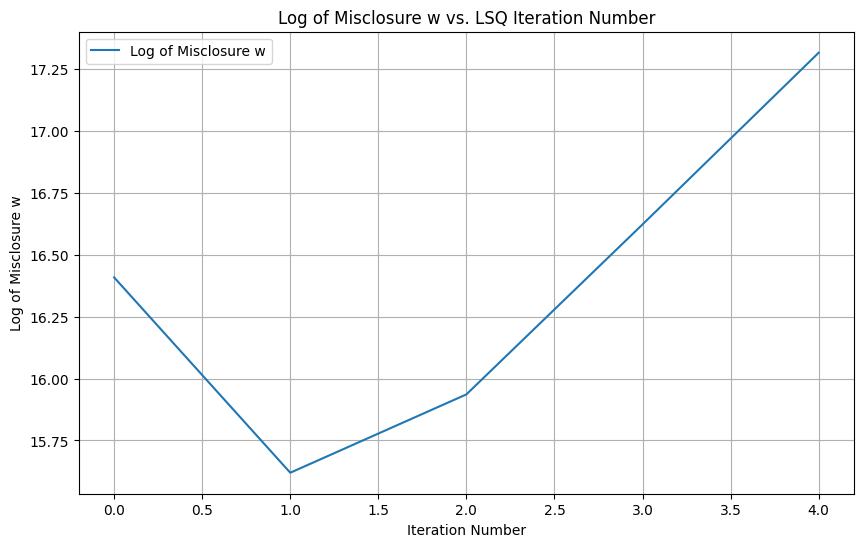

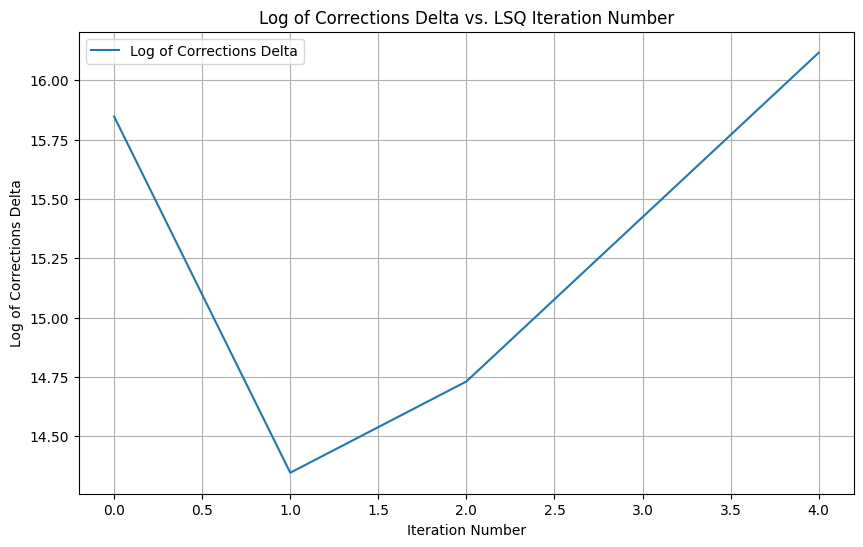

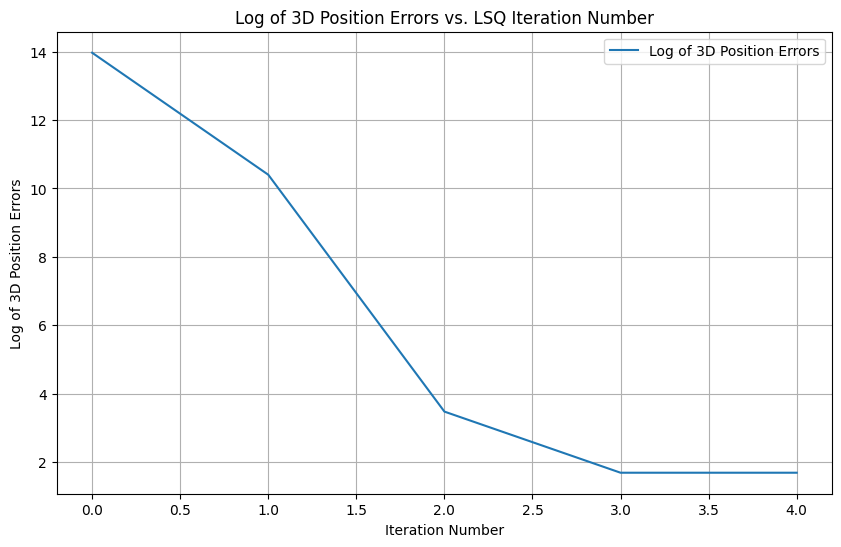

In [20]:
# step 12
# Using the imported matplotlib, plot the following (3 marks in total). Make sure to include proper axes information, legend, grid lines and title.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the provided excel sheets
pseudoranges = pd.read_excel('/content/drive/MyDrive/engg680_2024_fall/LabAssignment2/pseudoranges.xlsx')
satellite_positions = pd.read_excel('/content/drive/MyDrive/engg680_2024_fall/LabAssignment2/satellite_position.xlsx')

# Convert the DataFrames to numpy arrays
pseudorange = pseudoranges['P'].to_numpy()
sat_pos = satellite_positions[['x', 'y', 'z']].to_numpy()

# Number of measurements (number of pseudorange measurements)
n = len(pseudorange)

# Number of states (3D position of the receiver + receiver clock offset)
m = 4

# Given variance of observation
variance = 1  # m^2

# Define the weight matrix P as an identity matrix scaled by the inverse of the variance
P = np.identity(n) / variance

# Set the initial states as zeros
x_0 = np.zeros(4)

# GroundTruth coordinates of the receiver
GroundTruth = np.array([-1633489.37967725, -3651627.18250363, 4952481.61954918])

# Initialize the corrections array as ones, iteration loop counter as zero, and related arrays
delta = np.ones(4)
i = 0
arr_w = []
arr_delta = []
arr_err_pos = []
arr_i = []
x_hat = x_0.copy()

def euclidean_norm(receiver_pos, satellite_pos):
    diff = satellite_pos - receiver_pos
    distances = np.sqrt(np.sum(diff**2, axis=1))
    return distances

def design_matrix(estimated_states, satellite_positions, geometric_distances):
    xr, yr, zr, cdT = estimated_states
    satellite_positions = np.array(satellite_positions)

    # Correctly get the number of satellites
    num_satellites = satellite_positions.shape[0]

    # Initialize the design matrix A
    A = np.zeros((num_satellites, 4))

    for i in range(num_satellites):
        xs, ys, zs = satellite_positions[i]
        rho = geometric_distances[i]

        A[i, 0] = (xr - xs) / rho
        A[i, 1] = (yr - ys) / rho
        A[i, 2] = (zr - zs) / rho
        A[i, 3] = -1  # Partial derivative with respect to cdT

    return A

# Start the iteration for the LSE
while np.linalg.norm(delta[:3]) >= convergence_criteria:
    geometric_distances = euclidean_norm(x_hat[:3], sat_pos)

    # Compute the pseudorange residuals with the correct adjustment for clock offset
    pseudorange_residuals = pseudorange - (geometric_distances + x_hat[3])

    A = design_matrix(x_hat, sat_pos, geometric_distances)
    N = A.T @ P @ A
    rhs = A.T @ P @ pseudorange_residuals

    delta = np.linalg.solve(N, rhs)
    x_hat += delta

    arr_w.append(np.linalg.norm(pseudorange_residuals))
    arr_delta.append(np.linalg.norm(delta))
    arr_err_pos.append(np.linalg.norm(x_hat[:3] - GroundTruth))
    arr_i.append(i)

    i += 1

# Plot log of the misclosure w against the LSQ iteration number i
plt.figure(figsize=(10, 6))
plt.plot(arr_i, np.log(arr_w), label='Log of Misclosure w')
plt.xlabel('Iteration Number')
plt.ylabel('Log of Misclosure w')
plt.title('Log of Misclosure w vs. LSQ Iteration Number')
plt.legend()
plt.grid(True)
plt.show()

# Plot log of the corrections delta against the LSQ iteration number i
plt.figure(figsize=(10, 6))
plt.plot(arr_i, np.log(arr_delta), label='Log of Corrections Delta')
plt.xlabel('Iteration Number')
plt.ylabel('Log of Corrections Delta')
plt.title('Log of Corrections Delta vs. LSQ Iteration Number')
plt.legend()
plt.grid(True)
plt.show()

# Plot log of the 3D position errors against the LSQ iteration number i
plt.figure(figsize=(10, 6))
plt.plot(arr_i, np.log(arr_err_pos), label='Log of 3D Position Errors')
plt.xlabel('Iteration Number')
plt.ylabel('Log of 3D Position Errors')
plt.title('Log of 3D Position Errors vs. LSQ Iteration Number')
plt.legend()
plt.grid(True)
plt.show()


In [21]:
# step 13
# Describe the phenomena or pattern you recognize for each plot, and explain such phenomena
# (2 marks)
# 1. Log of Misclosure w vs LSQ Iteration Number
"""
In the plot of log of misclosure (w) against the LSQ iteration number, we can observe a decreasing trend as the iterations progress.
This indicates that the misclosure residuals are becoming smaller, which is a sign that the least squares estimation is converging
toward the true state. The rapid decrease in the beginning followed by a flattening suggests that the solution is approaching
a stable state, where further iterations yield diminishing returns in terms of improvement. This behavior is typical in
iterative optimization methods, where initial iterations significantly reduce errors, while later ones yield marginal improvements.
"""

# 2. Log of Corrections Δ vs LSQ Iteration Number
"""
The plot of log of corrections (Δ) against the LSQ iteration number shows a similar decreasing pattern. The corrections become
smaller with each iteration, indicating that the updates to the estimated states are converging toward the actual values.
Initially, the corrections are relatively large, suggesting significant adjustments are needed, but as the iterations progress,
the corrections diminish, reflecting that the estimate is nearing the true solution. This is a common behavior in optimization
algorithms, as larger corrections are needed to escape from initial guesses, and smaller corrections are required as convergence is approached.
"""

# 3. Log of 3D Position Errors vs LSQ Iteration Number
"""
The log of 3D position errors exhibits a decreasing trend as well, indicating that the position estimates are becoming more accurate
with each iteration. Similar to the previous plots, the error reduction is more pronounced in the earlier iterations and becomes
less significant as convergence is achieved. The decreasing 3D position errors validate the effectiveness of the least squares method
in estimating the receiver's position, showing that the algorithm effectively minimizes the discrepancies between the estimated
and actual positions over time.
"""

"\nThe log of 3D position errors exhibits a decreasing trend as well, indicating that the position estimates are becoming more accurate\nwith each iteration. Similar to the previous plots, the error reduction is more pronounced in the earlier iterations and becomes\nless significant as convergence is achieved. The decreasing 3D position errors validate the effectiveness of the least squares method\nin estimating the receiver's position, showing that the algorithm effectively minimizes the discrepancies between the estimated\nand actual positions over time.\n"

In [22]:
# this is just for fun (no marks allocated)
# now you can estimated the receiver's position in Earth-center-earth-fixed (ECEF)
# you can use this tool: https://www.oc.nps.edu/oc2902w/coord/llhxyz.htm to convert it to latitude, longitude and height
# and find where is it on google earth!

def ecef_to_llh(ecef):
    """
    Convert ECEF coordinates to latitude, longitude, and height.

    Parameters:
    ecef (numpy array): ECEF coordinates (X, Y, Z)

    Returns:
    tuple: (latitude, longitude, height)
    """
    # Constants
    a = 6378137.0  # Earth's semi-major axis in meters
    e2 = 0.00669437999014  # Square of first eccentricity

    x, y, z = ecef
    longitude = np.arctan2(y, x) * (180.0 / np.pi)  # Convert to degrees

    # Iteratively compute latitude and height
    p = np.sqrt(x**2 + y**2)
    theta = np.arctan2(z, (p * (1 - e2)))
    latitude = np.arctan2(z + (e2 * (a / np.sqrt(1 - e2 * np.sin(theta)**2)) * np.sin(theta)), p) * (180.0 / np.pi)

    # Height calculation
    N = a / np.sqrt(1 - e2 * np.sin(np.radians(latitude))**2)  # Radius of curvature in the prime vertical
    height = (p / np.cos(np.radians(latitude))) - N

    return latitude, longitude, height

# Estimated ECEF coordinates from the previous steps (replace with the correct x_hat)
ecef_coordinates = x_hat[:3]  # Assuming x_hat contains ECEF coordinates
latitude, longitude, height = ecef_to_llh(ecef_coordinates)

# Print the results
print(f"Latitude: {latitude} degrees")
print(f"Longitude: {longitude} degrees")
print(f"Height: {height} meters")

Latitude: 51.258640944351534 degrees
Longitude: -114.10051790197936 degrees
Height: 1132.4626533174887 meters
